### Marijan Milovec

# Data Science project - Heart Diseases

Dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29

Dataset is referencing on heart diseases

#### Variable description:

- age (integer)

- sex (binary) Female = 1, Male = 2

- chest pain type (categorical with 4 levels)

- resting blood pressure (continuous)

- serum cholestoral in mg/dl (continuous)

- fasting blood sugar > 120 mg/dl (binary)

- resting electrocardiographic results (categorical with 3 levels)

- maximum heart rate achieved (continuous)

- exercise induced angina (binary)

- oldpeak = ST depression induced by exercise relative to rest (continuous)

- the slope of the peak exercise ST segment (categorical with 3 levels)

- number of major vessels colored by flourosopy (categorical with 4 levels)

- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (categorical with 3 levels)

### Working environment and data set analysis

First, we will download the necessary libraries that we will use to analyze the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from scipy import stats

%matplotlib inline

We upload the data set in the variable

In [2]:
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"

We create a new list 'column_names' and we put in the list column names that are in the description of the default data set

In [3]:
column_names = ["age", "sex", "chest_pain_type", "resting_blood_pressure", 
                "serum_cholestoral", "fasting_blood_sugar",
                "resting_electrocardiographic_results", 
                "maximum_heart_rate_achieved", "exercise_induced_angina",
                "oldpeak", 
                "the_slope_of_the_peak_exercise_ST_segment", 
                "number_of_major_vessels", "thal", "absence"]

We upload to DataFrame our Dataset and we assign the column names from the list we have previously created.

In [4]:
df = pd.read_csv(url_data, sep=' ', names=column_names)

Printing first 15 rows from DataFrame that we have created

In [5]:
df.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,70.0,67.0,57.0,64.0,74.0,65.0,56.0,59.0,60.0,63.0,59.0,53.0,44.0,61.0,57.0
sex,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
chest_pain_type,4.0,3.0,2.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,1.0,4.0
resting_blood_pressure,130.0,115.0,124.0,128.0,120.0,120.0,130.0,110.0,140.0,150.0,135.0,142.0,140.0,134.0,128.0
serum_cholestoral,322.0,564.0,261.0,263.0,269.0,177.0,256.0,239.0,293.0,407.0,234.0,226.0,235.0,234.0,303.0
fasting_blood_sugar,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
resting_electrocardiographic_results,2.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0
maximum_heart_rate_achieved,109.0,160.0,141.0,105.0,121.0,140.0,142.0,142.0,170.0,154.0,161.0,111.0,180.0,145.0,159.0
exercise_induced_angina,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
oldpeak,2.4,1.6,0.3,0.2,0.2,0.4,0.6,1.2,1.2,4.0,0.5,0.0,0.0,2.6,0.0


Already with the previous command we can see that we do not have missing values for the first 15 rows, but we will certainly check it later on for the missing values on the whole dataset.

We will now check the size of the dataset and match the specifications on the page.
According to the specification of the dataset on the official site data, you should have 270 entries for each variable and 13 attributes ie variables.

In [6]:
df.shape

(270, 14)

We can see that we have 270 records and 14 attributes ie variables but 14th attributes is actually target variable that shows whether a heart disease is present or not at the patient

With info() method we can analyze our dataset and we can see how many records are in each variable and whether are there null values and we can see the type of the variables.

In [7]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age                                          270 non-null float64
sex                                          270 non-null float64
chest_pain_type                              270 non-null float64
resting_blood_pressure                       270 non-null float64
serum_cholestoral                            270 non-null float64
fasting_blood_sugar                          270 non-null float64
resting_electrocardiographic_results         270 non-null float64
maximum_heart_rate_achieved                  270 non-null float64
exercise_induced_angina                      270 non-null float64
oldpeak                                      270 non-null float64
the_slope_of_the_peak_exercise_ST_segment    270 non-null float64
number_of_major_vessels                      270 non-null float64
thal                                         270 non-null float64
absence                              

We can also analyze our dataset with describe() method that generates descriptive statistics.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest_pain_type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting_blood_pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting_blood_sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
maximum_heart_rate_achieved,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise_induced_angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


## 1.DATA QUALITY CONTROL

### - Recognizing missing values

According to the specification that is located on the link for our dataset, we should not have the missing values, but we will check independently whether we have any missing values.

In [8]:
print(df.isnull().values.any())

False


We see from the previous command that for the missing values ​​we get 'False' as feedback, meaning no missing values in our dataset

### - Identifying uniform or non-logical distributions

We will graphically display the distribution of our dataset

D:\PROGRAMMING\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


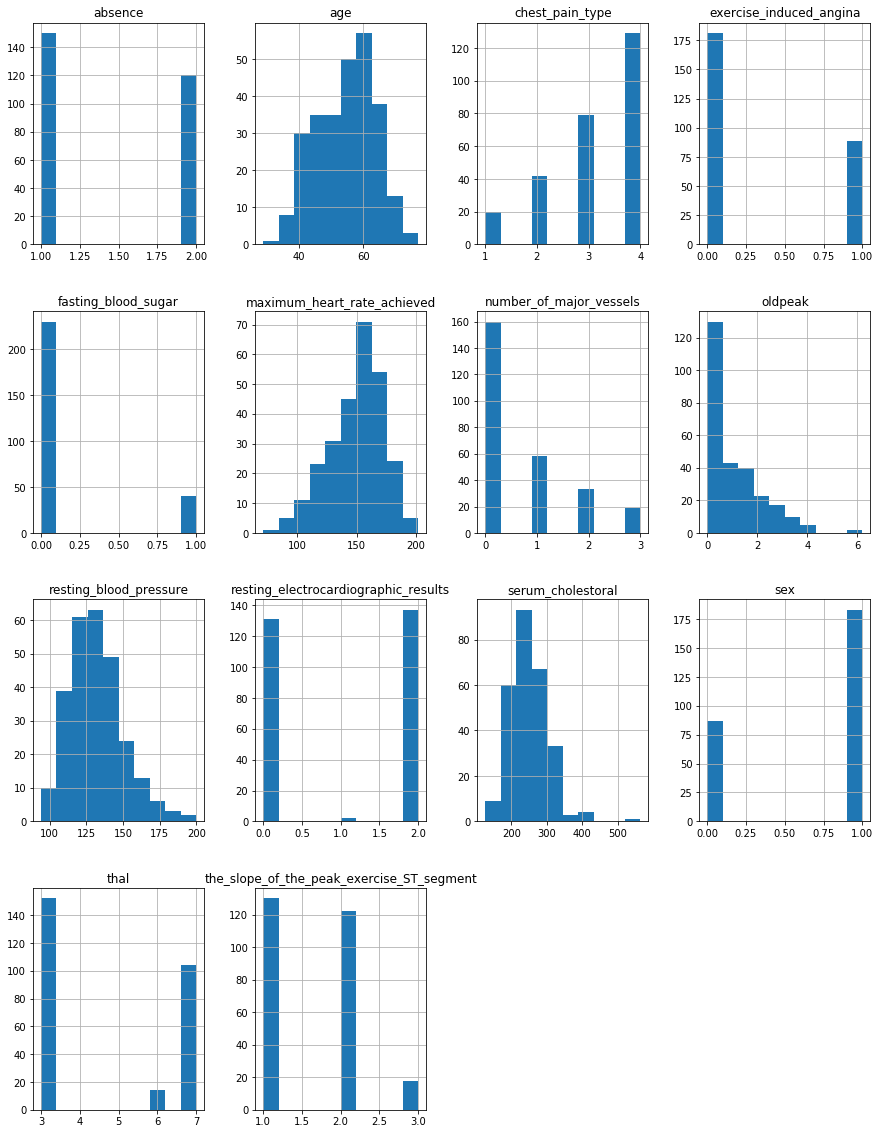

In [9]:
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.savefig('Hist.png')

### - Target variable

Given the dataset and available variables, we want to recognize which patients have heart disease or have no heart disease.

From the 'absent' target variable we create a new target variable 'heart_disease'. 
Then from the 'absence' variable where the value of '1' represents that no heart disease is present at the patient we convert to the 'NO' value in the new variable and by converting the '2' from the 'absence' variable which represent that heart disease is present at the patient we convert to ' YES 'in new variable.

In [10]:
df['heart_disease'] = 'NO'
health = 1

df.loc[df.absence > health, 'heart_disease']='YES'

### Analysis of the initial target variable 'absence'

We plot the graphical representation of variables and their values in relation to the target variable 'absence'.

The first graph shows the value for disease not present, ie for the value '1' in the target 'absence' variables, while the second graph shows values for the presence of the disease, ie the value '2' in the target 'absence' target.

absence
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

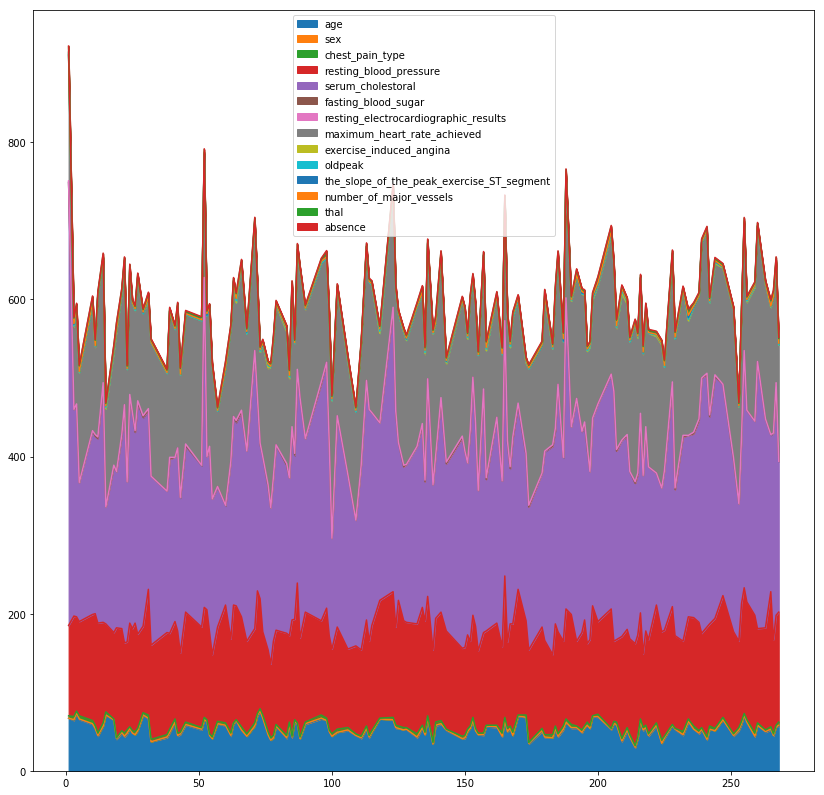

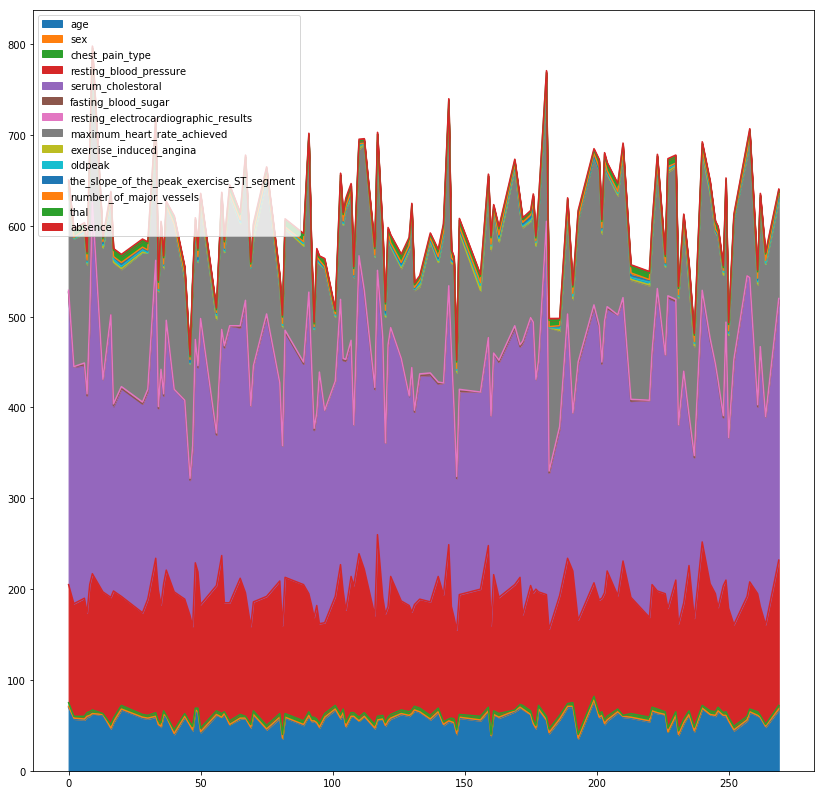

In [26]:
df.groupby('absence').plot(kind='area', figsize=(14,14))

We show the distribution of the target variable 'absence'

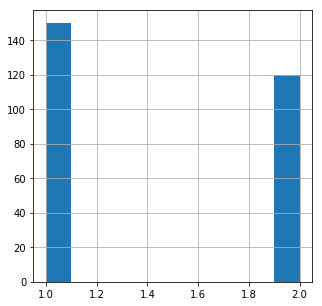

In [27]:
df.absence.hist(figsize=(5,5))

Analysis of newly created target variables 'heart_disease'

In [28]:
df.heart_disease.describe().transpose()

count     270
unique      2
top        NO
freq      150
Name: heart_disease, dtype: object

We print again the first 15 records to see if we have successfully created a new variable with the correct values

In [29]:
df.head(15).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,70,67,57,64,74,65,56,59,60,63,59,53,44,61,57
sex,1,0,1,1,0,1,1,1,1,0,1,1,1,1,0
chest_pain_type,4,3,2,4,2,4,3,4,4,4,4,4,3,1,4
resting_blood_pressure,130,115,124,128,120,120,130,110,140,150,135,142,140,134,128
serum_cholestoral,322,564,261,263,269,177,256,239,293,407,234,226,235,234,303
fasting_blood_sugar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
resting_electrocardiographic_results,2,2,0,0,2,0,2,2,2,2,0,2,2,0,2
maximum_heart_rate_achieved,109,160,141,105,121,140,142,142,170,154,161,111,180,145,159
exercise_induced_angina,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0
oldpeak,2.4,1.6,0.3,0.2,0.2,0.4,0.6,1.2,1.2,4,0.5,0,0,2.6,0


## 2. STATISTICAL DATA SURVEY ANALYSIS

### - Distribution of categorical variables

CATEGORICAL VARIABLES:

- chest pain type (categorical with 4 levels)

- resting electrocardiographic results (categorical with 3 levels)

- the slope of the peak exercise ST segment (categorical with 3 levels)

- number of major vessels colored by flourosopy (categorical with 4 levels)

- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (categorical with 3 levels)

We graphically display categorical variables and their distribution

D:\PROGRAMMING\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


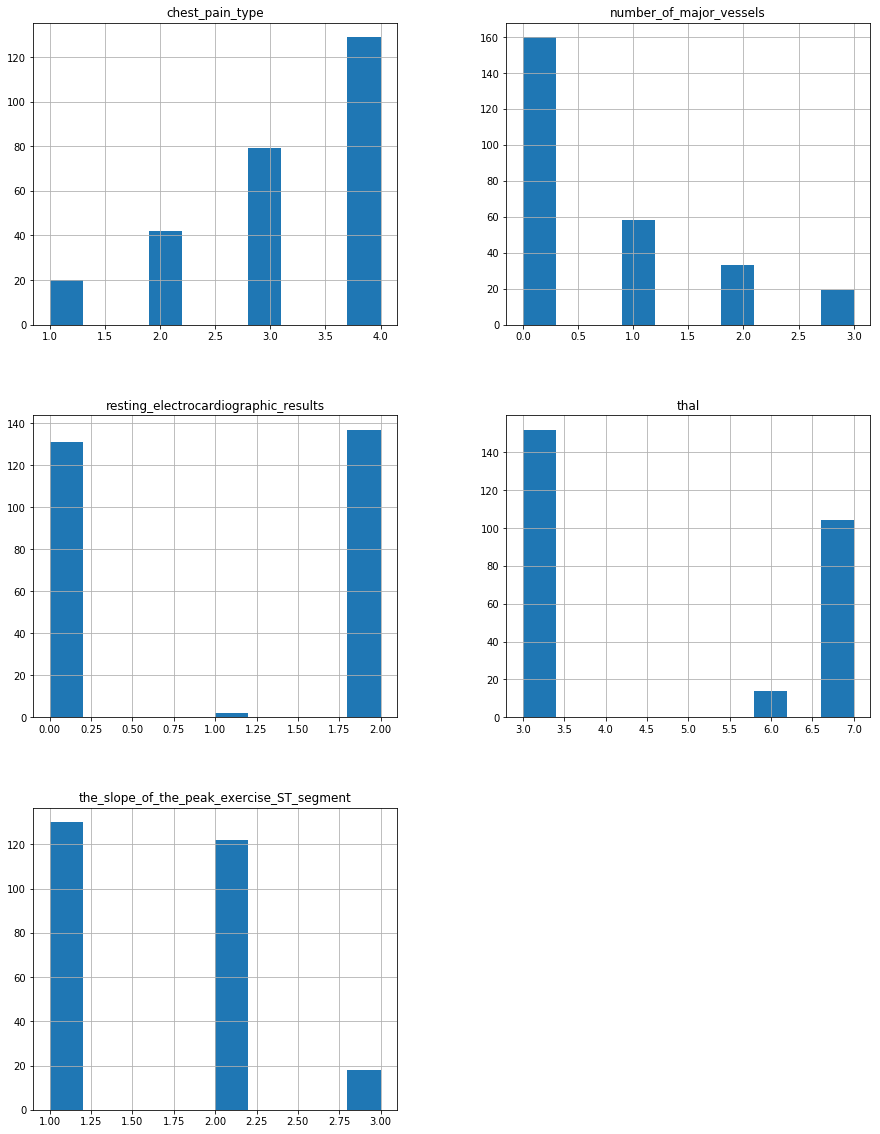

In [30]:
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df[['chest_pain_type', 'resting_electrocardiographic_results', 'the_slope_of_the_peak_exercise_ST_segment', 'number_of_major_vessels', 'thal']].hist(ax = ax)
plt.savefig('Distribucija kategoričkih varijabli.png')

### - Average value, Z value, distribution rounding, and distribution slope for continuous variables

Continuous variables:

- age (integer)

- resting blood pressure (continuous)

- serum cholestoral in mg/dl (continuous)

- maximum heart rate achieved (continuous)

- oldpeak = ST depression induced by exercise relative to rest (continuous)

#### - Average value of continuous variables

We calculate the mean value for continuous variables

In [31]:
df_continuous = df[["age", "resting_blood_pressure", "serum_cholestoral", "maximum_heart_rate_achieved", "oldpeak"]]
df_continuous.describe().loc["mean"]

age                             54.433333
resting_blood_pressure         131.344444
serum_cholestoral              249.659259
maximum_heart_rate_achieved    149.677778
oldpeak                          1.050000
Name: mean, dtype: float64

#### - Z value of continuous variables

We calculate Z values for continuous variables

In [32]:
for col in df_continuous:
    col_zscore = col + '_Z_score'
    df_continuous[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    
df_continuous.head(10).transpose()

D:\PROGRAMMING\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9
age,70.000000,67.000000,57.000000,64.000000,74.000000,65.000000,56.000000,59.000000,60.000000,63.000000
resting_blood_pressure,130.000000,115.000000,124.000000,128.000000,120.000000,120.000000,130.000000,110.000000,140.000000,150.000000
serum_cholestoral,322.000000,564.000000,261.000000,263.000000,269.000000,177.000000,256.000000,239.000000,293.000000,407.000000
maximum_heart_rate_achieved,109.000000,160.000000,141.000000,105.000000,121.000000,140.000000,142.000000,142.000000,170.000000,154.000000
oldpeak,2.400000,1.600000,0.300000,0.200000,0.200000,0.400000,0.600000,1.200000,1.200000,4.000000
age_Z_score,1.712094,1.382140,0.282294,1.052186,2.152032,1.162171,0.172309,0.502263,0.612248,0.942201
resting_blood_pressure_Z_score,-0.075410,-0.916759,-0.411950,-0.187590,-0.636310,-0.636310,-0.075410,-1.197209,0.485490,1.046389
serum_cholestoral_Z_score,1.402212,6.093004,0.219823,0.258589,0.374890,-1.408386,0.122905,-0.206613,0.840093,3.049805
maximum_heart_rate_achieved_Z_score,-1.759208,0.446409,-0.375291,-1.932198,-1.240239,-0.418539,-0.332044,-0.332044,0.878883,0.186925
oldpeak_Z_score,1.181012,0.481153,-0.656118,-0.743600,-0.743600,-0.568636,-0.393671,0.131224,0.131224,2.580731


#### - Circulation of the distribution of continuous variables

We calculate the roundabout distribution of continuous variables

In [33]:
df_continuous.kurtosis()

age                                   -0.544815
resting_blood_pressure                 0.923097
serum_cholestoral                      4.895599
maximum_heart_rate_achieved           -0.103072
oldpeak                                1.759317
age_Z_score                           -0.544815
resting_blood_pressure_Z_score         0.923097
serum_cholestoral_Z_score              4.895599
maximum_heart_rate_achieved_Z_score   -0.103072
oldpeak_Z_score                        1.759317
dtype: float64

#### - Slope of  distribution of continuous variables

We calculate the slope of the distribution of continuous variables

In [34]:
df_continuous.skew()

age                                   -0.163615
resting_blood_pressure                 0.722618
serum_cholestoral                      1.183721
maximum_heart_rate_achieved           -0.527737
oldpeak                                1.262893
age_Z_score                           -0.163615
resting_blood_pressure_Z_score         0.722618
serum_cholestoral_Z_score              1.183721
maximum_heart_rate_achieved_Z_score   -0.527737
oldpeak_Z_score                        1.262893
dtype: float64

### - Calculate the correlations of each variable with the target variable

We calculate the correlations of all variables with each other and graphically showing the relations where dark blue represents the greatest negative correlation to the target variable and we see that from the light blue color is starting the positive correlation up to the red color which indicates the highest positive correlation to the target variable and we see that with the red are actually correlated the same variables since correlation of the same variables is 1.0.

We also see general correlation of all variables to any variables from the given set of data.

In [35]:
df.corr(method='pearson').style.format("{:3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,the_slope_of_the_peak_exercise_ST_segment,number_of_major_vessels,thal,absence
age,1.0,-0.09440068675836744,0.09691976291212227,0.27305279703407537,0.2200563076497442,0.12345799575662718,0.12817096132903008,-0.40221544605675863,0.09829654924254987,0.19423393984626056,0.1597736263587953,0.35608057669675225,0.10609978082297827,0.2123221874434285
sex,-0.09440068675836744,1.0,0.03463555337125087,-0.06269339383516653,-0.2016474619490146,0.042139666212821614,0.03925345016659829,-0.07610146328515457,0.1800218334310573,0.09741185742008492,0.05054482547433518,0.08682993048901815,0.3910463853768916,0.2977207557240848
chest_pain_type,0.09691976291212227,0.03463555337125087,1.0,-0.043196129681452276,0.09046515490612965,-0.09853684839888979,0.07432523280186437,-0.31768203741019113,0.3531598358364855,0.16724401416755136,0.136899724275777,0.22588953227347888,0.2626586626778277,0.4174362056278526
resting_blood_pressure,0.27305279703407537,-0.06269339383516653,-0.043196129681452276,1.0,0.17301917553469223,0.15568098533925143,0.11615747802422637,-0.03913565537958089,0.08279263583509301,0.2227998254423034,0.14247197914842477,0.08569741400535592,0.13204507849376138,0.15538265617576888
serum_cholestoral,0.2200563076497442,-0.2016474619490146,0.09046515490612965,0.17301917553469223,1.0,0.025185943060135087,0.16765156674196363,-0.018739185482093974,0.07824252716241167,0.027709152153688434,-0.00575528493714472,0.12654147369258414,0.02883608227154437,0.11802053060516998
fasting_blood_sugar,0.12345799575662718,0.042139666212821614,-0.09853684839888979,0.15568098533925143,0.025185943060135087,1.0,0.053498789312836345,0.0224941671318695,-0.004107161685169656,-0.025537876889084543,0.04407599048417893,0.12377435877290477,0.04923747730984838,-0.01631883414420561
resting_electrocardiographic_results,0.12817096132903008,0.03925345016659829,0.07432523280186437,0.11615747802422637,0.16765156674196363,0.053498789312836345,1.0,-0.07462754511778392,0.0950983552949877,0.12003442564850995,0.16061431184982036,0.11436819812436139,0.0073372147867522995,0.1820907556827819
maximum_heart_rate_achieved,-0.40221544605675863,-0.07610146328515457,-0.31768203741019113,-0.03913565537958089,-0.018739185482093974,0.0224941671318695,-0.07462754511778392,1.0,-0.38071864440770653,-0.34904539856278105,-0.38684686162694065,-0.2653327768216646,-0.2533969346331509,-0.4185139653265939
exercise_induced_angina,0.09829654924254987,0.1800218334310573,0.3531598358364855,0.08279263583509301,0.07824252716241167,-0.004107161685169656,0.0950983552949877,-0.38071864440770653,1.0,0.2746722001924773,0.2559083528067458,0.15334735567064067,0.3214490703767784,0.41930270919029683
oldpeak,0.19423393984626056,0.09741185742008492,0.16724401416755136,0.2227998254423034,0.027709152153688434,-0.025537876889084543,0.12003442564850995,-0.34904539856278105,0.2746722001924773,1.0,0.6097115673478997,0.25500546187126316,0.32433307118919036,0.41796743722742663


Here we graphically show the direct correlation of the variables in relation to the target and below the graphical representation. We print the correlations of the individual variables to the target variables.

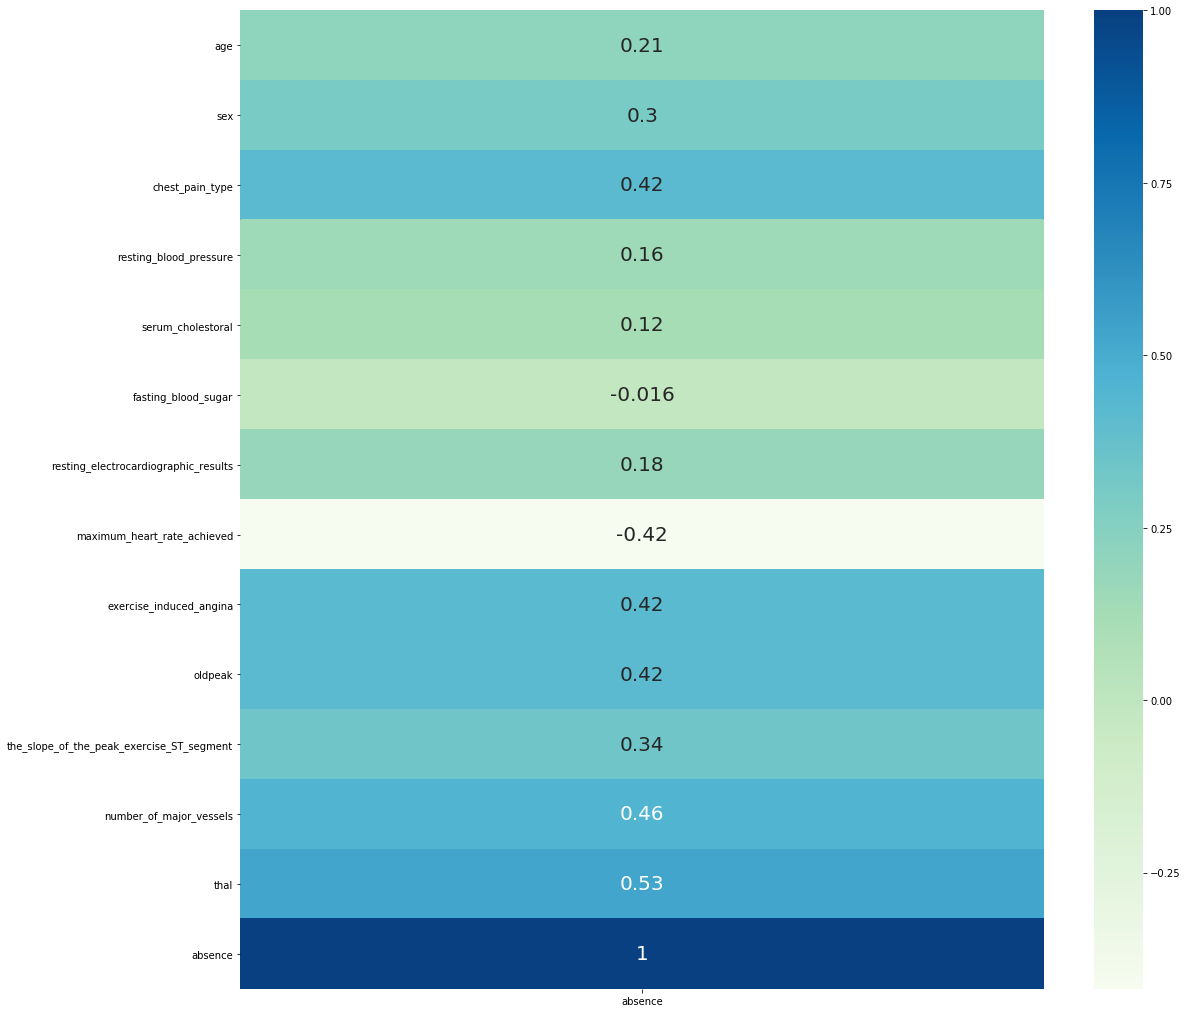

age                                          0.212322
sex                                          0.297721
chest_pain_type                              0.417436
resting_blood_pressure                       0.155383
serum_cholestoral                            0.118021
fasting_blood_sugar                         -0.016319
resting_electrocardiographic_results         0.182091
maximum_heart_rate_achieved                 -0.418514
exercise_induced_angina                      0.419303
oldpeak                                      0.417967
the_slope_of_the_peak_exercise_ST_segment    0.337616
number_of_major_vessels                      0.455336
thal                                         0.525020
absence                                      1.000000
Name: absence, dtype: float64

In [36]:
df_goal_variable = df[df.columns[:]].corr()['absence'][:]
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_goal_variable.to_frame(),annot=True, annot_kws={'size':20},cmap="GnBu")
plt.show();
df_goal_variable

In [37]:
bins = [-float("inf"), -3, 3, float("inf")]
labels = ["<-3", "(-3 do 3)", ">3"]

correlations = df[df.columns[:]].corr()["absence"][:]
pd.cut(((correlations-correlations.mean()) / correlations.std()), bins=bins, labels=labels)

age                                          (-3 do 3)
sex                                          (-3 do 3)
chest_pain_type                              (-3 do 3)
resting_blood_pressure                       (-3 do 3)
serum_cholestoral                            (-3 do 3)
fasting_blood_sugar                          (-3 do 3)
resting_electrocardiographic_results         (-3 do 3)
maximum_heart_rate_achieved                  (-3 do 3)
exercise_induced_angina                      (-3 do 3)
oldpeak                                      (-3 do 3)
the_slope_of_the_peak_exercise_ST_segment    (-3 do 3)
number_of_major_vessels                      (-3 do 3)
thal                                         (-3 do 3)
absence                                      (-3 do 3)
Name: absence, dtype: category
Categories (3, object): [<-3 < (-3 do 3) < >3]

#### - Analysis of the observed set of data

We see that by the Z values we do not have an outlier, ie we do not have any variables that would be larger than 3 times standard deviations of the mean or variables that would be less than 3 times standard deviations of the mean.
We can conclude that according to the Z values all the variables are correct since they are in the range of between -3 and 3 according to the Z score scale.

For correlator variables, we can see that the highest positive correlation has a 'thal' variable (0.525020), while the highest negative correlation has a variable 'maximum_heart_rate_achieved' (- 0.418514).

## 3. IV, WoE calculations

#### - Calculate IV, WoE for each variable

Creating the Information Value and Weight of Evidence function

In [38]:
def iv_all(df, varijabla, ciljna):
    a = df[varijabla]
    b = df[ciljna]
    IV=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
    IV['NO'] = IV['NO'].apply(lambda x: x if x!=0 else 0.005)
    IV['YES'] = IV['YES'].apply(lambda x: x if x!=0 else 0.005)
    IV['WoE'] = np.log(IV['YES']/IV['NO'])
    IV['IV'] =(IV['YES']-IV['NO'])* np.log(IV['YES']/IV['NO'])
    return (IV['IV'].sum())

def woe_all(df,varijabla,ciljna):
    a = df[varijabla]
    b = df[ciljna]
    WOE=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
    WOE['NO'] = WOE['NO'].apply(lambda x: x if x!=0 else 0.005)
    WOE['YES'] = WOE['YES'].apply(lambda x: x if x!=0 else 0.005)
    WOE['WoE'] = np.log(WOE['YES']/WOE['NO'])
    WOE['IV'] =(WOE['YES']-WOE['NO'])* np.log(WOE['YES']/WOE['NO'])
    return (WOE['WoE'].sum())

IV_WoE= pd.DataFrame() 
for col in [col for col in df if col != 'heart_disease']: 
        IV_WoE_df = pd.DataFrame([[col,iv_all(df,col,'heart_disease'), woe_all(df,col,'heart_disease')]],columns = ['Varijabla','IV', 'WoE'])
        IV_WoE = IV_WoE.append(IV_WoE_df)

Print the Information Value for each variable and WoE for each category in the variables.

Sorted by the highest Information Value.

In [39]:
print(IV_WoE.sort_values(by='IV', ascending=False))

                                   Varijabla         IV        WoE
0                                    absence  10.543652   0.000000
0                                       thal   1.238192   0.825069
0                            chest_pain_type   1.138256  -2.236124
0                    number_of_major_vessels   1.043148   3.421979
0                maximum_heart_rate_achieved   0.899612   5.026740
0                          serum_cholestoral   0.896551   6.568642
0                                    oldpeak   0.892338  12.540873
0                    exercise_induced_angina   0.757381   0.645245
0                                        age   0.731471  -2.210118
0  the_slope_of_the_peak_exercise_ST_segment   0.643662   0.345862
0                                        sex   0.390681  -0.576344
0                     resting_blood_pressure   0.332311   2.847977
0       resting_electrocardiographic_results   0.136472   0.186997
0                        fasting_blood_sugar   0.001083  -0.06

We see that in the Information Value calculation the 'absence' variable has the highest IV.
This is because 'absence' is a target variable and the Information Value is the biggest one for target variable ie 'absence' variable.

Information Value tells us which variables are important to the predictive model.

Here we show what predictive power the variable is in relation to its Information Value.

Information Value	    Pedictivity of variable
- less then 0.02	    The variable is not useful for prediction
- 0.02 to 0.1	        Low predictive power
- 0.1 to 0.3	        Medium predictable power
- 0.3 to 0.5	        Strong predictable power
- more than 0.5	        Very strong predictable power


We can see in this table that our Information Value has many variables that have strong predictive power and very strong predictive power.

Print Information Value for each variable and Weight of Evidence for each category in the variable.

Sorted by the largest Weigth of Evidence.

In [40]:
print(IV_WoE.sort_values(by='WoE', ascending=False))

                                   Varijabla         IV        WoE
0                                    oldpeak   0.892338  12.540873
0                          serum_cholestoral   0.896551   6.568642
0                maximum_heart_rate_achieved   0.899612   5.026740
0                    number_of_major_vessels   1.043148   3.421979
0                     resting_blood_pressure   0.332311   2.847977
0                                       thal   1.238192   0.825069
0                    exercise_induced_angina   0.757381   0.645245
0  the_slope_of_the_peak_exercise_ST_segment   0.643662   0.345862
0       resting_electrocardiographic_results   0.136472   0.186997
0                                    absence  10.543652   0.000000
0                        fasting_blood_sugar   0.001083  -0.065452
0                                        sex   0.390681  -0.576344
0                                        age   0.731471  -2.210118
0                            chest_pain_type   1.138256  -2.23

#### - We calculate WoE for each variable individually and showing graphically

Again, we define WoE function for categories in variables.

In [41]:
def woe(df,varijabla,ciljna):
    a = df[varijabla]
    b = df[ciljna]
    WOE=pd.crosstab(a,b).apply(lambda c: c/c.sum(), axis=0)
    WOE['NO'] = WOE['NO'].apply(lambda x: x if x!=0 else 0.005)
    WOE['YES'] = WOE['YES'].apply(lambda x: x if x!=0 else 0.005)
    WOE['WoE'] = np.log(WOE['YES']/WOE['NO'])
    WOE['IV'] =(WOE['YES']-WOE['NO'])* np.log(WOE['YES']/WOE['NO'])
    return (WOE)

#### 1. thal

We graphically display WoE individually for variables with the highest Information Value, but we will not use the 'absence' variable.

Graphical representation WoE for the 'thal' variable.

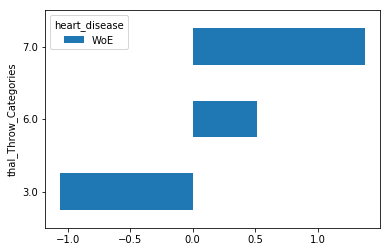

In [42]:
width_bin = (df.thal)
df = df.assign(thal_Throw_Categories=width_bin)

woe_df = woe(df,'thal_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_thal.png')

From the histogram for the 'thal' categorical variable we see that patients with thal = 7 values have a greater chance of having a heart disease.

We can conclude that the value of thal = 7 has a positive effect on our target variable, ie, it is more likely that a patient is a cardiac patient and at the same time increases the number of patients with heart disease.

For the value of thal = 6 we also see that it has a slight positive effect on the target variable, ie it also affects the growth of the diseased patients.

While for thal = 3, we see it negatively affecting the target variable, i.e. reducing the number of patients with heart disease.

A brief explanation of thal variables:
thal variable or thallium, thallium is a radioactive heart scan where one can see how much blood comes to different parts of the heart.
Scanning is performed to determine size and location of damaged heart muscle injury and helps doctors see the state of the heart and the blood to the heart and the heart muscle.

- thal=3 -> normal -> there are no visible signs of damage on the heart
- thal=6 -> fixed defect -> there is damage to the heart
- thal=7 -> reversible defect -> so called cold spots on the scans, ie apart from heart damage, there are parts of the heart that are not supplied to the blood

#### Conclusion: 
Patients with thal more than 3 should definitely pay more attention and submit to additional tests and hospitalization as they fall into a group where there is a great potential to fall into the category of heart disease.

#### 2. chest_pain_type

Graphical representation WoE for the 'chest_pain_type' variable.

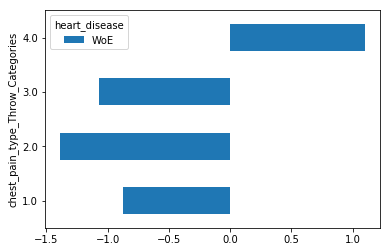

In [43]:
width_bin = (df.chest_pain_type)
df = df.assign(chest_pain_type_Throw_Categories=width_bin)

woe_df = woe(df,'chest_pain_type_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_chest_pain_type.png')

From the histogram for the 'chest_pain_type' variable we can conclude that patients with chest_pain_type = 4, indicating the type of chest pain (1 = the least present pain, 4 = the highest present level of pain) positively affect the target variable ie growth of heart disease but there is a bad influence on the patient.

#### Conclusion:
For patients with chest_pain_type = 4 be sure to pay more attention and send to hospital care since there is a possibility for a patient that he or she is in the category of heart disease patients with type 4 chest pain.

#### 3. number_of_major_vessels

Graphical representation WoE for the 'number_of_major_vessels' variable.

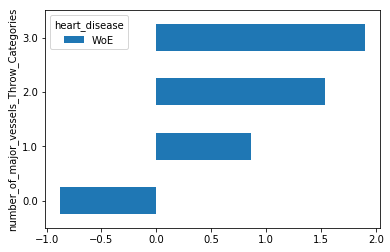

In [44]:
width_bin = (df.number_of_major_vessels)
df = df.assign(number_of_major_vessels_Throw_Categories=width_bin)

woe_df = woe(df,'number_of_major_vessels_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_number_of_major_vessels.png')

Ovdje vidimo kako za varijablu 'number_of_major_vessels' i vrijednost varijable '0' imamo negativan utjecaj na ciljnu varijablu tj. broj oboljelih pada ali pozitivan utjecaj na pacijente.

Here we see how the variable 'number_of_major_vessels' and the value of variable '0' have a negative impact on the target variable, ie it has a positive influence on the patients health and represents no heart disease at the patients.

#### Conclusion:
Patients with value '0' for the 'number_of_major_vessels' variable are not in a risk group where there is a potential for heart disease, while for patients with '1', '2' and '3' values for variables 'number_of_major_vessels' is recommended for additional examinations and Hospital treatment.

#### 4. maximum_heart_rate_achieved

Graphical representation WoE for the 'maximum_heart_rate_achieved' variable.

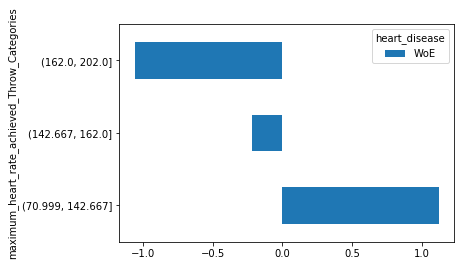

In [45]:
width_bin = (pd.qcut(df.maximum_heart_rate_achieved, 3))
df = df.assign(maximum_heart_rate_achieved_Throw_Categories=width_bin)

woe_df = woe(df,'maximum_heart_rate_achieved_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_maximum_heart_rate_achieved.png')

The 'maximum_heart_rate_achieved' variable shows the maximum number of heart rate that some of the patients have achieved, the greater the number of beats the patient can achieve, the more general view is that the body is healthier and more powerful, especially the heart.


Here we can see that patients with values between 162 to 202 beats per minute are in better health and these values have a negative impact on the target variable, ie the number of patients with heart disease is reduced and influence positive to the condition of patients.
While patients who have reached the maximum number of beats between 71 and 143 beats per minute are badly affected by their condition associated with heart disease, and generally this is a worse physical condition, and these values have a positive effect on the increase in the number of patients with heart disease, and negatively on the patients health.

#### Conclusion:
We can conclude that patients who have between 162 and 202 beats per minute fall into the risk-free group, and patients who have reached between 71 and 143 maximum beats per minute fall into the high risk group and we see that we have a group of patients who have reached the maximum number of beats between 143 - 162 beats per minute, and there is a slightly negative effect on the variable, ie a decrease in heart disease, ie a mildly positive effect on the health of the patient alone.

#### 5. serum_cholestoral

Graphical representation WoE for the 'serum_cholestoral' variable.

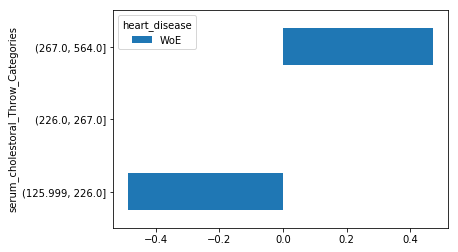

In [46]:
width_bin = (pd.qcut(df.serum_cholestoral, 3))
df = df.assign(serum_cholestoral_Throw_Categories=width_bin)

woe_df = woe(df,'serum_cholestoral_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_serum_cholestoral.png')

#### Conclusion:
We see that the values of 126 - 226 for the serum cholestoral variable affect negative to the target variables, ie positive to the number of patients that have heart disease, while the values for 'serum cholestoral' of 267-565 positive affect our target variables ie negative on the number of patients that have heart disease.
We can say that lower the serum cholestoral better is health of the patient and lower risk for heart disease.

#### 6. oldpeak

Graphical representation WoE for the 'oldpeak' variable.

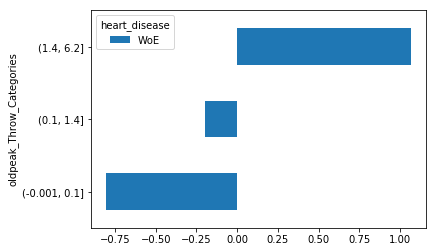

In [47]:
width_bin = (pd.qcut(df.oldpeak, 3))
df = df.assign(oldpeak_Throw_Categories=width_bin)

woe_df = woe(df,'oldpeak_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_oldpeak.png')

#### Conclusion:
We can see that for values from -0.01 to 0.1 for the 'oldpeak' variable negatively affect the growth of target variables ie it affects positive on the patients health and reducing heart disease and the values for 'oldpeak' between 1.4 - 6.2 positively affect the target variable, ie it negatively affects patients health and increasing heart disease and number of heart diseases.

#### 7. exercise_induced_angina

Graphical representation WoE for the 'exercise_induced_angina' variable.

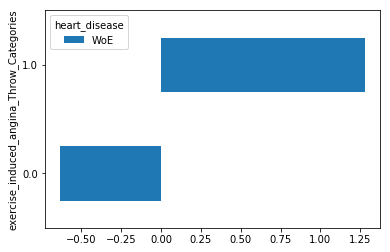

In [48]:
width_bin = df.exercise_induced_angina
df = df.assign(exercise_induced_angina_Throw_Categories=width_bin)

woe_df = woe(df,'exercise_induced_angina_Throw_Categories','heart_disease')
woe_df[['WoE']].plot(kind='barh')
plt.savefig('CatVar_exercise_induced_angina.png')

The variable 'exercise_induced_angina' refers to the lack of blood flow to the heart and chest pain but this pain is caused due to exercise and is called induced angina, with the presence of multiple types of induced angina, but in our set of data refers to induced angina induced by exercise .
In the data set of variables there is a binary record '0' and '1', where '0' means that there was no induced angina and '1' where it occurred in patients.

#### Conclusion:
We see that in patients without induced angina, where the value of exercise_induced_angina = '0' has a negative effect on our target variable, ie positive to reduce the number of cardiovascular diseases and reduce the possibility that the patient has a heart attack, while the code cases where the 'exercise_induced_angina' variable has the value of '1' and induced angina has occurred during exercise, we see that it has a great influence on the possibility that the patient has a heart disease and thus affects the growth in the number of patients suffering from heart disease.

## Conclusion:

We can conclude that patients who have no visible damage to thallium scan heart, and patients who do not have type 4 pain in the chest, and whose value_of_major_vessels value is "0", and can achieve maximum heart rate between 162-202 beats per minute , serum cholestoral between 126 - 226, oldpeak is between -0.1-1.4 and did not have induced angina during the exercise fall into the category of patients who have less chance of having heart disease and affect the reduction of our target variables, ie to reduce the number of cardiovascular diseases.